# ABCM Computer lab 1: Social coordination & Theory of mind

In this computer lab, we will use the tomsup package created by Waade et al. (2022) to simulate various Game Theory games between agents that have varying levels of theory of mind (or other strategies).

If you are completely new to Jupyter notebooks, start with this introduction:
[https://realpython.com/jupyter-notebook-introduction/](https://realpython.com/jupyter-notebook-introduction/)

All exercises are indicated with an **Exercise _N_** header. The notebook also contains some explanation, which is also interleaved with small coding exercises (of the form _"In the code cell below, do X"_) which help you understand how the code works.

First, install the ```tomsup``` package by running the code cell below:

In [21]:
#!pip3 install tomsup

Now, let's do the necessary imports by running the code cell below:

In [2]:
import tomsup as ts
import numpy as np
import matplotlib.pyplot as plt

Here are a few things to keep in mind throughout the computer lab:
- When plotting results, pay attention to the scale of the y-axis.
- When running simulations, make sure that you run:
    1. Enough rounds such that the agents' behaviour and/or estimates of each other's parameters is no longer changing (i.e., that you run the simulation until convergence).
    2. Enough independent simulation runs to get a good sense of the stochastic variation between runs

## Exploring the games in tomsup

**Exercise 1:**

Use the command ```help(ts.PayoffMatrix)``` (see page 11 of Waade et al., 2022) to explore what Game Theory games are pre-specified in the tomsup package. Print and investigate each of these pay-off matrices. For each one: Write down whether they are competitive or cooperative in nature. Also explain why.

**Note** that there's a typo in one of the game names in the documentation of ```tomsup```. It should be ```'penny_competitive'```, _not_ ```'penny_competive'```.

In [23]:
# help(ts.PayoffMatrix)

game_names = ['staghunt', 'penny_competitive', 'penny_cooperative', 'party', 'sexes', 'chicken', 'deadlock', 'prisoners_dilemma']

for game_name in game_names:
    print('===============[' + game_name + ']===============')
    print(ts.PayoffMatrix(name = game_name))
    print()


===============[staghunt]===============
<Class PayoffMatrix, Name = staghunt> 
The payoff matrix of agent 0
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 3 |
agent 0| 1 | 0 | 5 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 0 |
agent 0| 1 | 3 | 5 |
 

===============[penny_competitive]===============
<Class PayoffMatrix, Name = penny_competitive> 
The payoff matrix of agent 0
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 | -1 |  1 |
agent 0|  1 |  1 | -1 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
agent 0|  1 | -1 |  1 |
 

===============[penny_cooperative]===============
<Class PayoffMatrix, Name = penny_cooperative> 
The payoff matrix of agent 0
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
agent 0|  1 

- <font color='##1589FF'>stughunt: Cooperative, because both agents get the biggest reward when they both choose Choice 1
- penny_competitive: Competitive, because whenver agent 0 wins, agent 1 loses and vice versa
- penny_cooperative: Cooperative, because (the name says so) when they both make the same choice (e.g., 1 & 1), they get rewards, and when they make different choices (e.g., 0 & 1), they both lose
- party: Cooperative, because when they both make the same choice (e.g., 1 & 1), they get rewards, and when they make different choices (e.g., 0 & 1), they both lose
- sexes: Cooperative, because when agent 0 gets reward, agent 1 always gets reward too.
- chicken: Competitive, as there is no scinario where both agents get rewards.
- deadlock: Cooperative, as when both agents choose 1, they both get rewards.
- prisoners_dilemma: Competitive, because when agent 0 gets reward (i.e., agent0 betray [1] and agent1 remains silent [0]), agent 1 loses.<font>

<font color='orange'>
Correct
<font>

**Exercise 2:**

```penny_competitive``` is an example of a zero-sum game. The definition of a zero-sum game is as follows:
_"games in which choices by players can neither increase nor decrease the available resources. In zero-sum games, the total benefit that goes to all players in a game, for every combination of strategies, always adds to zero (more informally, a player benefits only at the equal expense of others)"_
Can you find any other example of a zero-sum game among the predefined games in the tomsup package?

<font color='#1589FF'>I beleive "chicken" is another example of a zero-sum game as whenver either agent gets reward (i.e., 1), the other agent loses the same amount.<font>

<font color='orange'>
The definition of zero-sum game applies to the whole of the game, rather than just situations in the game. You are absolutely right that there is a combination of strategies in chicken that yield a zero-sum output. However, the definition states "for every combination of strategies" the total benefit must equal zero, and that is not the case for chicken.
<font>

**Exercise 3:**

```prisoners_dilemma``` is an example of a game that has a Nash equilibrium that is suboptimal for both agents. That is, when both agents decide to betray each other (i.e, both choose action 0), they are worse off than if they both remain silent (i,e., both choose action 1). However, if they are in a state where they both choose action 0, neither agent can improve their own pay-off by changing strategy, making this state a Nash equilibrium. 
Can you find any other games among the predefined games that have such a Nash equilibrium that is suboptimal for both agents? If so, explain why.

<font color='#1589FF'>I believe deadlock is another example of a game that has a Nash equilibrium. When both agents decide to choose Choice 1, changing their strategies (i.e., switching to Choice 0) will only make them lose two points.<font>

<font color='orange'>
Deadlock is not quite an example of what this question was getting at. That's because there is no suboptimal Nash equilibrium that the agents can get stuck in together. The definition of a Nash equilibrium is a state in which neither agent can improve their individual pay-off by unilaterally changing strategy (i.e., while the other agent sticks to the same strategy). In Deadlock, both agents can get out of the situation where they both choose action 0, because changing strategy will increase their individual pay-off from 1 to 3.  
<br>
<br>
"party" is a game that is an example of what the question was getting at: there is a Nash equilibrium that the agents can get stuck in that is suboptimal for both agents (when both agents choose action 0).
<font>

## Running interactions between agents

### Creating a game:
A game can be created using the ```PayoffMatrix``` class, as follows:

In [24]:
penny = ts.PayoffMatrix(name='penny_competitive')

print(penny)

<Class PayoffMatrix, Name = penny_competitive> 
The payoff matrix of agent 0
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 | -1 |  1 |
agent 0|  1 |  1 | -1 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |    |  0 |  1 |
       | ------------ |
Choice |  0 |  1 | -1 |
agent 0|  1 | -1 |  1 |
 


Try this in the code cell below by creating a staghunt game and printing it:

In [25]:
staghunt = ts.PayoffMatrix(name = 'staghunt')
print(staghunt)

<Class PayoffMatrix, Name = staghunt> 
The payoff matrix of agent 0
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 3 |
agent 0| 1 | 0 | 5 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 3 | 0 |
agent 0| 1 | 3 | 5 |
 


### Creating a group of agents

A group of agents can be created quickly, using the ```create_agents()``` function, which returns an object of the ```AgentGroup``` class. This function takes two input arguments:
1. ```agents```: specifies the agent types in the group. Possible agent types are:
    - 'RB'
    - 'QL'
    - 'WSLS'
    - '1-TOM'
    - '2-TOM'
2. ```start_params```: specifies the starting parameters for each agent. An empty dictionary {}, denoted by ```{}``` gives default values

In [26]:
starting_parameters = [{'bias':0.7}, {'learning_rate':0.5}, {}, {}, {}]

In the code cell below, use the ```ts.create_agents()``` function to create an object of the ```AgentGroup``` class, which you assign to a variable called ```group```.
Use the following input arguments:
1. Create a list called ```agent_types``` which contains all possible agent types names as listed above. Pass that as the ```agents``` argument
2. Create a list called ```starting_parameters``` which contains:
    - ```{'bias':0.7}``` for the 'RB' agent
    - ```{'learning_rate':0.5}``` for the 'QL' agent
    - the default parameters (i.e., empty dictionary) for all other agent types

Once you've created your ```group``` object, print it and inspect it, using ```print(group)``` 

In [27]:
agent_types = ['RB', 'QL', 'WSLS', '1-TOM', '2-TOM']
starting_parameters = [{'bias':0.7}, {'learning_rate':0.5}, {}, {}, {}]

group = ts.create_agents(agent_types, starting_parameters)
print(group)

<Class AgentGroup, envinment = None> 

RB	 | 	{'bias': 0.7}
QL	 | 	{'learning_rate': 0.5}
WSLS	 | 	{}
1-TOM	 | 	{}
2-TOM	 | 	{}


You can inspect the further functionality of the ```AgentGroup``` class using the following command:

In [28]:
help(ts.AgentGroup)

Help on class AgentGroup in module tomsup.agent:

class AgentGroup(builtins.object)
 |  AgentGroup(agents: List[str], start_params: Optional[List[dict]] = None)
 |  
 |  An agent group is a group of agents. It is a utility class to allow for
 |  easily setting up tournaments.
 |  
 |  Examples:
 |      >>> round_table = AgentGroup(agents=['RB']*2,             start_params=[{'bias': 1}]*2)
 |      >>> round_table.agent_names
 |      ['RB_0', 'RB_1']
 |      >>> RB_0 = round_table.get_agent('RB_0') # extract an agent
 |      >>> RB_0.bias == 1 # should naturally be 1, as we specified it
 |      True
 |      >>> round_table.set_env('round_robin')
 |      >>> result = round_table.compete(p_matrix="penny_competitive",             n_rounds=100, n_sim=10)
 |      Currently the pair, ('RB_0', 'RB_1'), is competing for 10 simulations,             each containg 100 rounds.
 |          Running simulation 1 out of 10
 |          Running simulation 2 out of 10
 |          Running simulation 3 out o

### Setting the type of interaction

The ```.set_env()``` method of the AgentGroup class allows you to set the type of 'tournament' that the agents will interact in. The possible strings that can be passed to the ```env``` input argument are:
- 'round_robin': Matches all agents against all others
- 'random_pairs': Combines the agents in random pairs (the number of agents must be even)

Assuming you have now created an ```AgentGroup``` object called ```group```, the code cell below shows you how to set the environment to ```'round_robin'```:

In [29]:
group.set_env(env='round_robin')

### Running a tournament

The ```.compete()``` method of the AgentGroup class allows you to run a competition between the agents of the type that you've specified using the ```.set_env()``` method.

Assuming you have now created an ```AgentGroup``` object called ```group```, the code cell below shows you how to run a tournament of the 'penny_competitive' game, where the group cometes for 50 simulations of 50 rounds (note that this takes a little while to run). The ```.compete()``` method returns a Pandas dataframe containing various results of the tournament. Below, this dataframe is saved in a variable called ```results```.

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Suppress future warnings

results = group.compete(p_matrix='penny_competitive', n_rounds=50, n_sim=50, save_history=True, verbose=False)

Assuming the tournament has finished running, we can have a look at the structure of the ```results``` dataframe using the ```.head``` attribute of the Pandas dataframe, which gets the first 5 and last 5 rows of the dataframe:

In [40]:
print(results.head) # print the first row

<bound method NDFrame.head of       n_sim  round  choice_agent0  choice_agent1  payoff_agent0  \
0         0      0              0              0             -1   
1         0      1              1              0              1   
2         0      2              0              0             -1   
3         0      3              1              0              1   
4         0      4              0              0             -1   
...     ...    ...            ...            ...            ...   
2495     49     45              0              1              1   
2496     49     46              1              1             -1   
2497     49     47              1              0              1   
2498     49     48              0              1              1   
2499     49     49              1              0              1   

      payoff_agent1                                     history_agent0  \
0                 1                                      {'choice': 0}   
1                

### Plotting heatmap of tournament results

The ```AgentGroup``` class also comes with a number of plotting methods (use ```help(ts.AgentGroup)``` to inspect). The ```.plot_heatmap()``` method creates a heatmap of the rewards of all agents in the tournament, similar to Figure 3 (p. 17) in Waade et al. (2022). The code cell below demonstrates how to using this method (assuming the tournament has finished running):

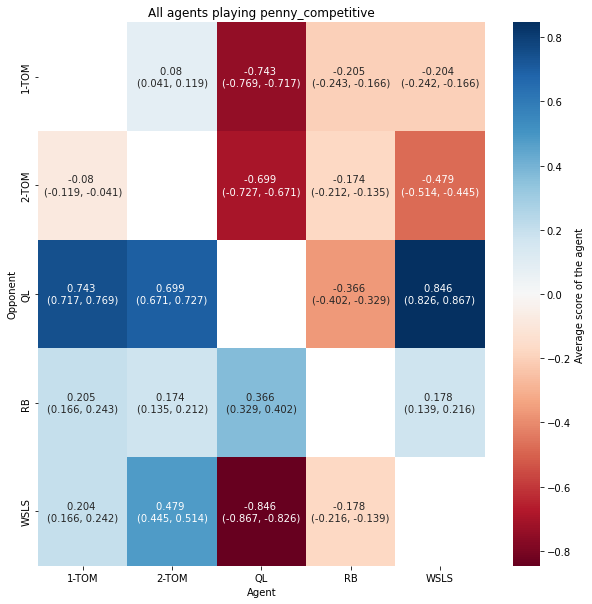

In [41]:
# Set background color of the outer 
# area of the plt
plt.figure(facecolor='white')

plt.rcParams["figure.figsize"] = [10, 10] # Set figure size
plt.title("All agents playing penny_competitive") # Set figure title
group.plot_heatmap(cmap="RdBu")

This heatmap displays the average score across simulations for each competing pair. The score denotes the score of the agent (x-axis) when playing against the opponent (y-axis). The score in the parenthesis denotes the 95% confidence interval.

**Exercise 4:**

In the ```'penny_competitive'``` game, the ```'2-TOM'``` agent usually has a slight advantage over the ```'1-TOM'``` agent when they play against each other (see top-left corner of the heatmap).
Write some code that focuses on interactions between ```'1-TOM'``` and ```'2-TOM'``` agents, in order to find out whether there are games among the predefined games in ```tomsup``` for which this is the other way around. That is, where the ```'1-TOM'``` agent outperforms the ```'2-TOM'``` agent when they interact with each other.

**Tip 1:** The ```.compete()``` method does a lot of printing as it's running. If this is getting in your way, you can switch off the printing by setting the ```verbose``` input argument of the ```.compete()``` method to ```False```.

**Tip 2:** You can give a title to a figure using ```plt.title("my_title_string")```.

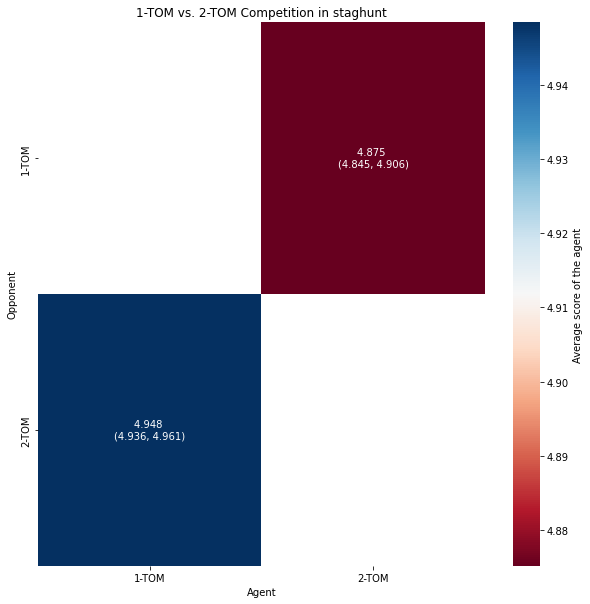

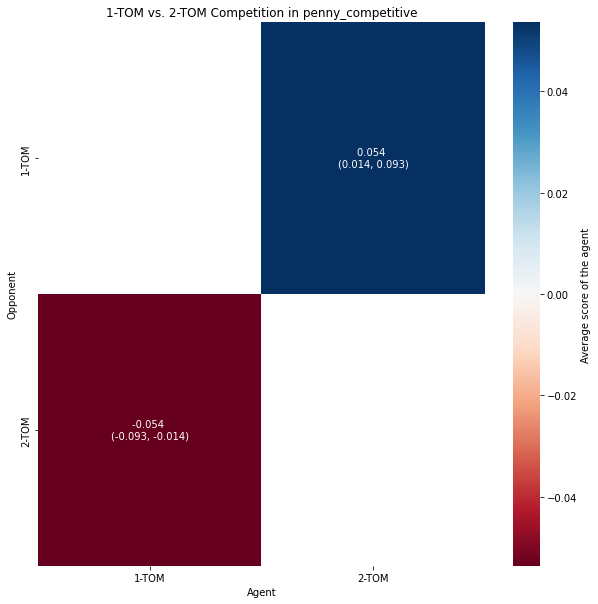

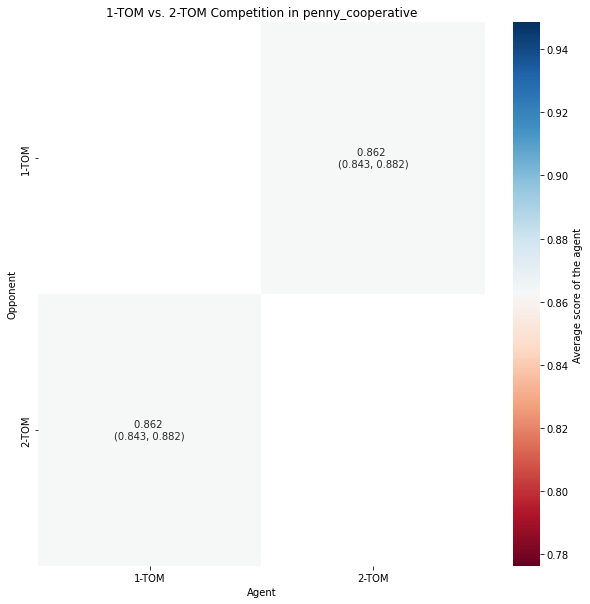

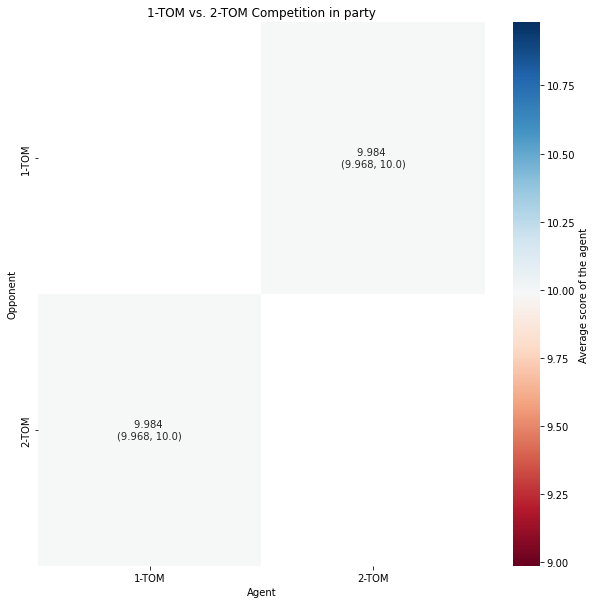

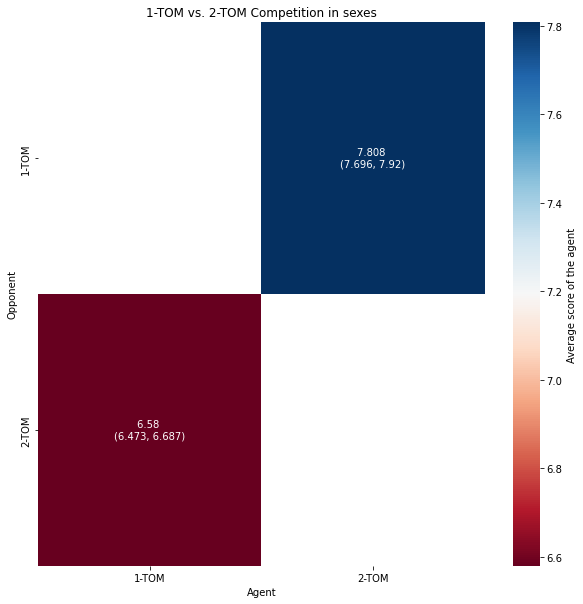

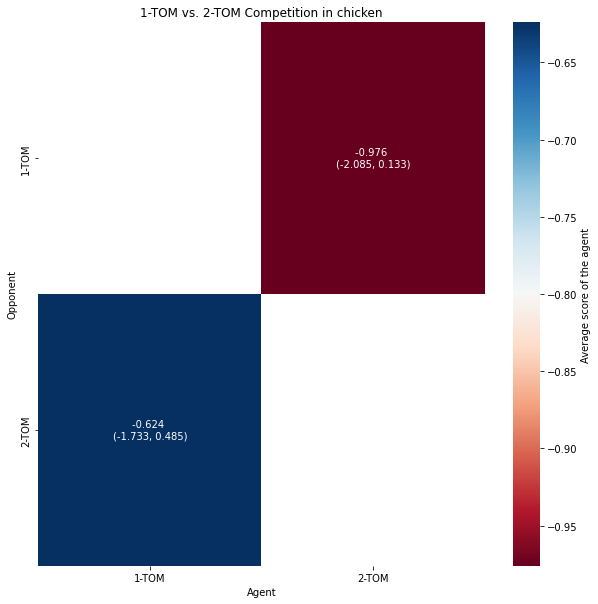

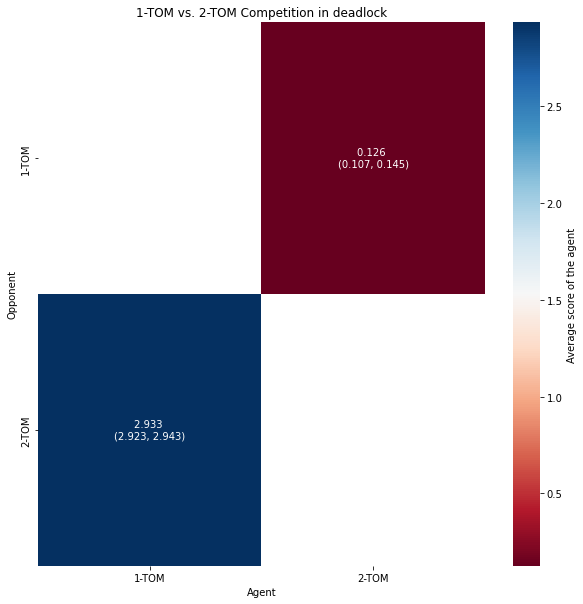

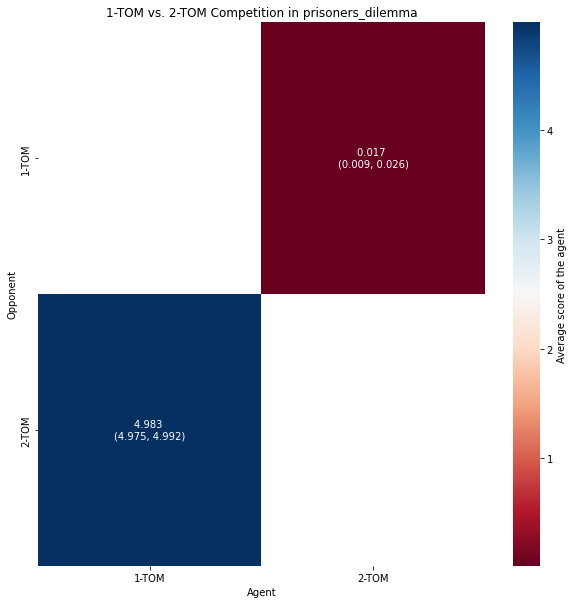

In [42]:
#Suppress future warnings as they make the figures difficult to compare
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Create group
agent_tom = ['1-TOM', '2-TOM']
starting_parameters_tom = [{}, {}]
group_tom = ts.create_agents(agent_tom, starting_parameters_tom)

#Set up tornamanet environment for the group
group_tom.set_env(env='round_robin')

#Simulate the competition (25 sims & 25 rounds) and plot the scores for all games using for loop
game_names = ['staghunt', 'penny_competitive', 'penny_cooperative', 'party', 'sexes', 'chicken', 'deadlock', 'prisoners_dilemma']
for game_name in game_names:
    result_tom = group_tom.compete(p_matrix=game_name, n_rounds=50, n_sim=50, save_history=True, verbose=False)
    
    plt.figure(facecolor='white')
    plt.rcParams["figure.figsize"] = [10, 10] # Set figure size
    plt.title(f"1-TOM vs. 2-TOM Competition in {game_name}") # Set figure title
    group_tom.plot_heatmap(cmap="RdBu")

<font color='#1589FF'>1-TOM agent outperforms 2-TOM agent in staguhunt, chicken, and deadlock and prisoners_dilemma<font>

<font color='orange'>
Correct
<font>

### Plotting agents' scores over rounds:

The ```AgentGroup``` class comes with a method ```.plot_score()``` which allows you to plot how the scores of the agents change over rounds (as they're learning about each other). Below is an example for how to use this method to plot the scores over time of the ```'1-TOM'``` agent when playing against the ```'2-TOM'``` agent.

<Figure size 720x720 with 0 Axes>

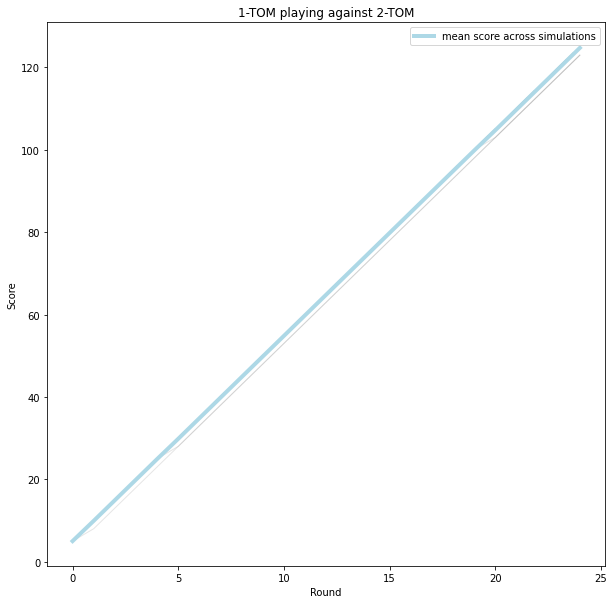

<Figure size 720x720 with 0 Axes>

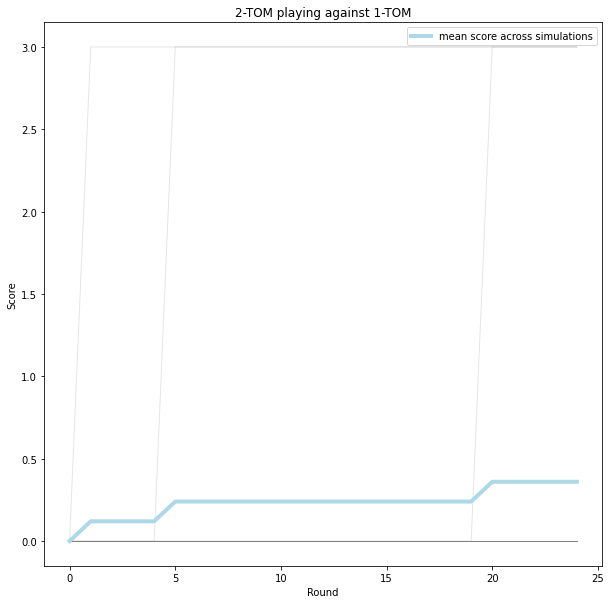

In [34]:
group_tom.plot_score(agent0="1-TOM", agent1="2-TOM", agent=0)
group_tom.plot_score(agent0="1-TOM", agent1="2-TOM", agent=1)

As you can see, the ```1-TOM``` agent's mean score doesn't change much over time, but the individual simulations do start differing more from each other over rounds. In the text box below, write down your thoughts about what could be the cause of this.

<font color='#1589FF'>I believe the 1-TOM agent's mean score doesn't change much over rounds as they have equall chance to successufully estimate the 2-TOM agent's choice and fail to do so, and the chance of correctly estimating the oppenent's choice remains over time. <font>

<font color='orange'>
Correct
<font>

### Plotting agent choices over rounds:

The ```AgentGroup``` class also comes with a method ```.plot_choice()``` which allows you to plot the choices of the agents across rounds. Below is an example for how to use this method to plot the choices of the ```'1-TOM'``` agent against those of the ```'2-TOM'``` agent.

<Figure size 720x720 with 0 Axes>

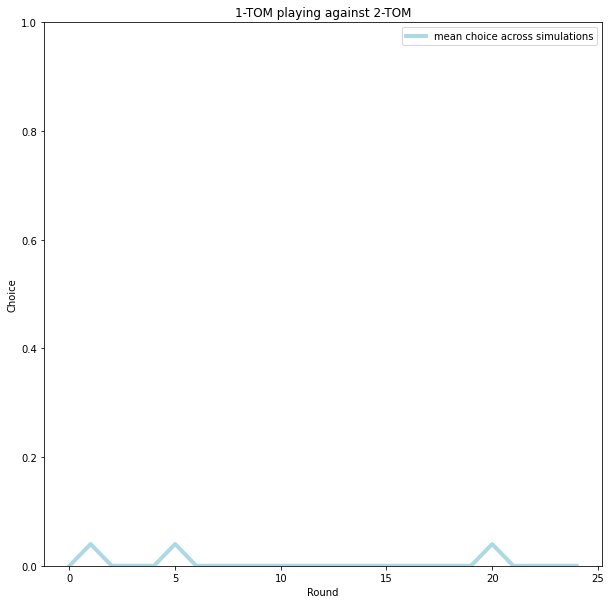

In [35]:
group_tom.plot_choice(agent0="1-TOM", agent1="2-TOM", agent=0)

### Plotting _k_-ToM agent's estimate of other agent's sophistication level (_k_):

The ```AgentGroup``` class also comes with a method ```.plot_p_k()``` which allows you to plot a given _k_-ToM agent's estimate of what the other agent's level of _k_ is, over rounds. Below is an example for how to use this method to plot the probability that the ```'2-TOM'``` agent assigns to the possibility that the ```'1-TOM'``` agent that they are playing against has sophistication level of _k_=1, over rounds.

<Figure size 720x720 with 0 Axes>

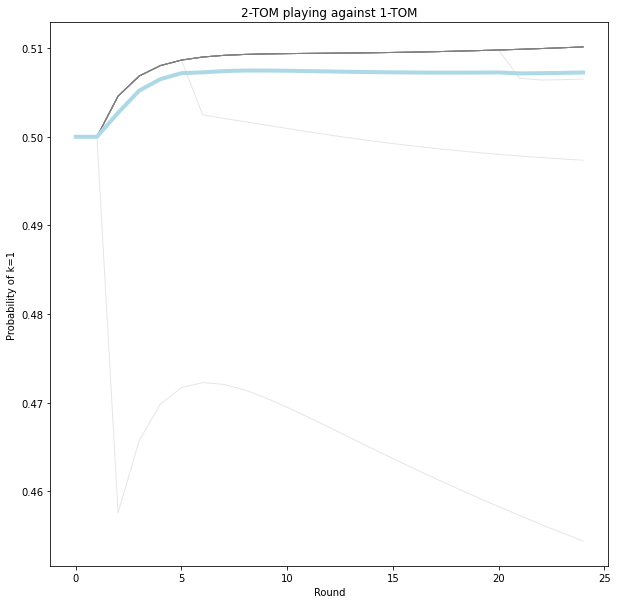

In [36]:
# The agent input argument specifies which agent's estimate should be shown (agent0 or agent1)
# The level input argument specifies for which level of k the probability should be shown over rounds

group_tom.plot_p_k(agent0="1-TOM", agent1="2-TOM", agent=1, level=1)

**Exercise 5:**

Choose one of the games that came out of Exercise 4 as a very clear example of a game where the ```1-TOM``` agent has a significant advantage over the ```2-TOM``` agent. For this particular game, try to figure out why this might be the case.
Good first steps towards figuring this out are:
1. Inspect the pay-off matrix of the game in question
2. Plot the scores of the two agents over rounds **when playing the game in question**
3. Plot the choices that the two agents make **when playing the game in question**
4. Plot the agents' estimates of each other's sophistication levels (_k_) **when playing the game in question**

<Class PayoffMatrix, Name = deadlock> 
The payoff matrix of agent 0
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 1 | 0 |
agent 0| 1 | 3 | 2 |
 
The payoff matrix of agent 1
       |  Choice agent 1
       |   | 0 | 1 |
       | --------- |
Choice | 0 | 1 | 3 |
agent 0| 1 | 0 | 2 |
 


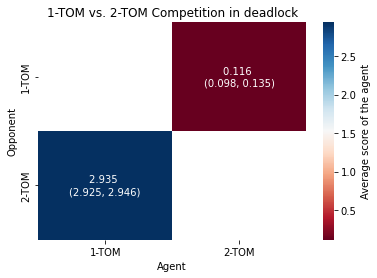

<Figure size 720x720 with 0 Axes>

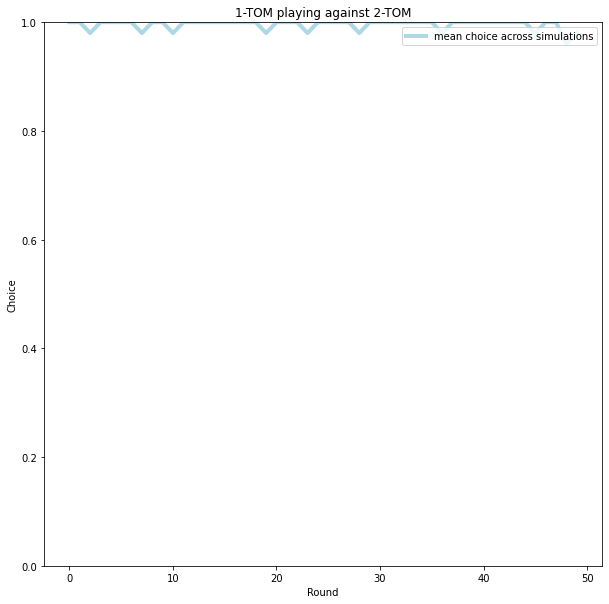

<Figure size 720x720 with 0 Axes>

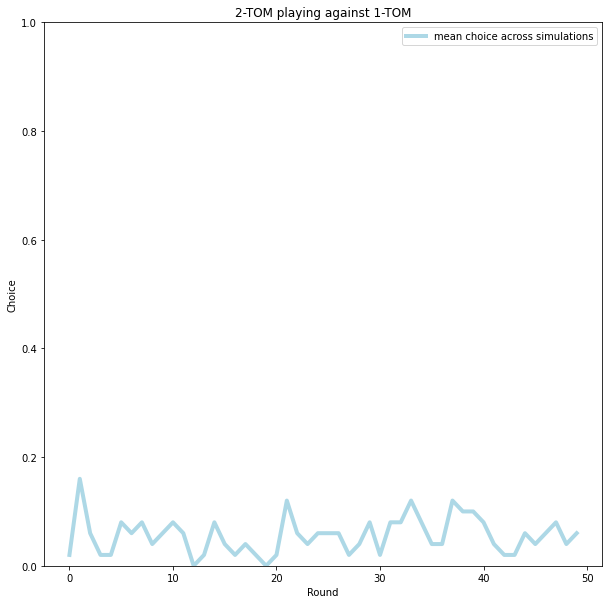

<Figure size 720x720 with 0 Axes>

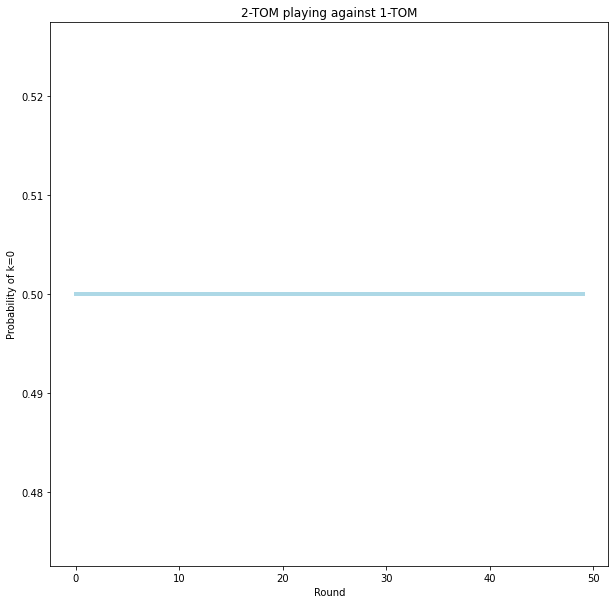

<Figure size 720x720 with 0 Axes>

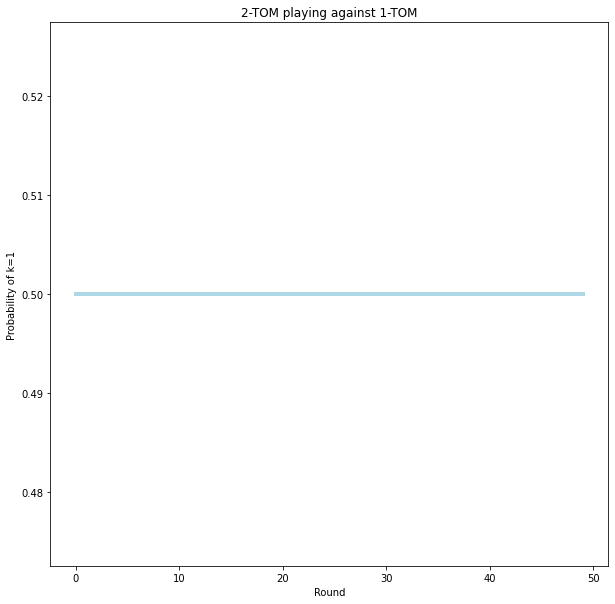

<Figure size 720x720 with 0 Axes>

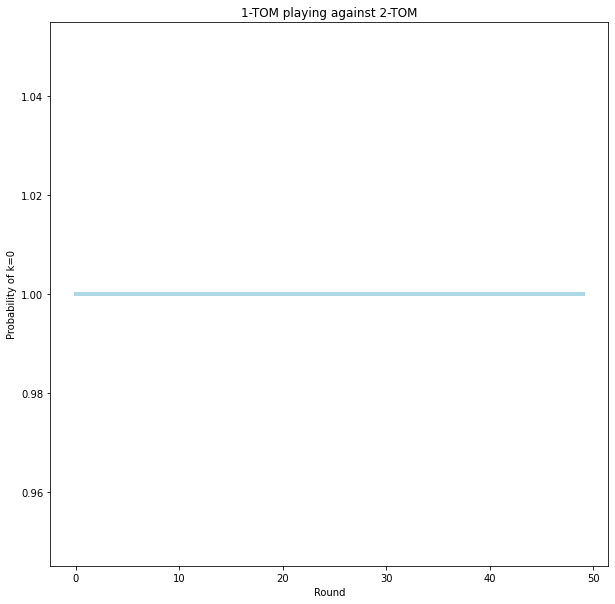

In [3]:
#Looking at the plots of 1-TOM agent vs. 2-TOM agent competition,
#deadlock seems to be the game where 1-TOM agent outperforms 2-TOM agent the most.
#*I thought until today's lecture that scores in prisoners dilemma corresponded to years of custody, which means higher scores = losing.
#That is why I didn't choose prisoners dilemma.
game_name = 'deadlock'


###[Inspect the pay-off matrix of the game in question]
print(ts.PayoffMatrix(name = game_name))

#The payoff matrix suggests that choosing Choice 1 is mutually beneficial for both agents,
#although the agent gets the highest reward when the opponent chooses Choice 0 and the agent chooses Choice 1.


###[Plot the scores of the two agents over rounds when playing the game in question]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

agent = ['1-TOM', '2-TOM']
starting_parameters = [{}, {}]
group_ex5 = ts.create_agents(agent, starting_parameters)
group_ex5.set_env(env='round_robin')

results = group_ex5.compete(p_matrix=game_name, n_rounds=50, n_sim=50, save_history=True, verbose=False)
plt.figure(facecolor='white')
plt.rcParams["figure.figsize"] = [10, 10] # Set figure size
plt.title(f"1-TOM vs. 2-TOM Competition in {game_name}") # Set figure title
group_ex5.plot_heatmap(cmap="RdBu")

#Again, 1-TOM agent outperforms 2-TOM agent


###[Plot the choices that the two agents make when playing the game in question]
group_ex5.plot_choice(agent0="1-TOM", agent1="2-TOM", agent=0)
group_ex5.plot_choice(agent0="1-TOM", agent1="2-TOM", agent=1)

#1-TOM agent tends to choose Choice 1, while 2-TOM agent tends to choose Choice 2


###[Plot the agents' estimates of each other's sophistication levels (_k_) when playing the game in question]
group_ex5.plot_p_k(agent0="1-TOM", agent1="2-TOM", agent=1, level=0)
group_ex5.plot_p_k(agent0="1-TOM", agent1="2-TOM", agent=1, level=1)
group_ex5.plot_p_k(agent0="1-TOM", agent1="2-TOM", agent=0, level=0)



<font color='#1589FF'>I am unsure why 1-TOM agent outperforms 2-TOM agent in this game, but one thing I can say is that 1-TOM agent gets higher points than 2-TOM agent because they almost always choose Choice 1, which results in either 2 or 3 points depending on the oppent's choice. However, 2-TOM agent is more likely to choose Choice 0, which result in either no point or 1 point. This is puzzling because choosing Choice 1 will lead to higher points regardless of the opponent's choice, but somehow 2-TOM agent tends to do so. This could be because 1-TOM agent prioritizes in earning higher points, but 2-TOM agents prioritizes in estimating the oppoent's choice over earing more points. 

I am not sure as to why the estimation of k is not changing over time.<font>

<font color='orange'>
Well done on probing different aspects of the question, and on showing the questions that arise, even if you may not have a definitive answer yet.
<font>

**BONUS Exercise 6 (only if you have time left):**

Continuing with the same game you inspecting for Exercise 5, have a look at what happens when the ```1-TOM``` and ```2-TOM``` agent interact with the 'random bias' agent ('RB').

Use the ```.plot_tom_op_estimate()``` of the ```AgentGroup``` class to inspect how the ```2-TOM``` agent estimates the ```RB``` agent's bias over time. Does the ```2-TOM``` agent reach the accurate inference eventually. You may want to run more rounds to make sure that the model has converged (i.e., that the ```2-TOM``` agent's estimate of the bias is no longer changing).